In [40]:
#https://github.com/RashmiRatnayake/Image-Processing-Project-Resistor-Scanner-

import os
import cv2
import math
import matplotlib.pyplot as plt

def findResistance(first_read_image):

    #convert image from BGR to RGB
    image = cv2.cvtColor(first_read_image, cv2.COLOR_BGR2RGB)

    rows, columns, channels = image.shape

    #print the shape of image
    print ('Image shape: ', image.shape)

    #get mean color value of the image
    mean_color = cv2.mean(image)
    #print the mean
    print ('mean: ', mean_color)

    #make 3 new arrays with size equal to number of columns in small image
    numbers_of_dark_pixels_in_each_column = [0 for i in range(columns)]
    addition_of_row_numbers_having_dark_pixels_in_each_column = [0 for i in range(columns)]
    average_of_row_numbers_having_dark_pixels_in_each_column = [0 for i in range(columns)]

    #travel row by row downwards in each column from left to right in small image
    global num
    for x in range(0,columns):
        num = 0
        for y in range(0,rows):
            #get pixel value in small image and assign to a new variable res
            res = image[y,x]

            #res is empty if no image loaded, then continue
            if res is None:
                continue
            #if the respecitve values stored in res are greater than half of the respective values in the mean color of the small image
            #then pass (these are the light parts of the image)
            #if not, increment num by 1 and set respective array position of avgy equal to column number as the value already stored plus y
            if res[0] > mean_color[0] * 0.5 and res[1] > mean_color[1] * 0.5 and res[2] > mean_color[2] * 0.5:
                pass
            else:
                num += 1
                addition_of_row_numbers_having_dark_pixels_in_each_column[x] += y

        #once the iteration of rows along a column is over,
        #if num is greater than 2, set value in nums at index equal to column number, as num
        #and set value in avgy at index equal to column number, as (value already there divided by num)
        if num > 2:
            numbers_of_dark_pixels_in_each_column[x] = num
            average_of_row_numbers_having_dark_pixels_in_each_column[x]=((addition_of_row_numbers_having_dark_pixels_in_each_column[x]) / num)

    average_dark_pixels = 0
    count = 0
    for x in range(0, columns):
        if numbers_of_dark_pixels_in_each_column[x] > 0:#if nums(column number) is greater than 0, then do this
            average_dark_pixels += numbers_of_dark_pixels_in_each_column[x] #add the values in nums array that are greater than 0
            count += 1 #count the number of values greater than 0 

    #gettin row and column values to extract out part of image and draw rectangle
    x_min = -1
    x_max = 0

    if count > 0: #if there are values greater than 0 in nums array 
        average_dark_pixels /= count #get the average times the num has been greater than 0 by dividing total by number of values greater than 0
        for x in range(0,columns):
            if numbers_of_dark_pixels_in_each_column[x] > average_dark_pixels + 15: #if nums(column number) is greater than ((average times the num has been greater than 0) + 15)
                if x_min < 0:#this will happen only in first iteration as minx is -1 and after that minx is updated to x
                    x_min = x #set minx as respective index of nums array 
                x_max = x # set maxx as respective index of nums array

    if x_min >= 0: #if minx is greater than or equal to 0 (ie. respective index of nums array saved above is higher than 0)
        y_min = average_of_row_numbers_having_dark_pixels_in_each_column[x_min] 
        y_max = average_of_row_numbers_having_dark_pixels_in_each_column[x_max]
        x_min_2 = x_min - 20

        if x_min_2 < 0:
            x_min_2 = 0
        if x_min_2 > len(average_of_row_numbers_having_dark_pixels_in_each_column) - 1:
            x_min_2 = len(average_of_row_numbers_having_dark_pixels_in_each_column) - 1

        x_max_2 = x_max + 20
        if x_max_2 < 0:
            x_max_2 = 0
        if x_max_2 > len(average_of_row_numbers_having_dark_pixels_in_each_column) - 1:
            x_max_2 = len(average_of_row_numbers_having_dark_pixels_in_each_column) - 1

        ratio = (average_of_row_numbers_having_dark_pixels_in_each_column[x_max_2] - average_of_row_numbers_having_dark_pixels_in_each_column[x_min_2]) / ((x_max_2) - (x_min_2))
        y_min = (int) (ratio * (x_min - x_min_2) + average_of_row_numbers_having_dark_pixels_in_each_column[x_min_2])
        y_max = (int) (ratio * (x_max - x_max_2) + average_of_row_numbers_having_dark_pixels_in_each_column[x_max_2])

        w = x_max - x_min#width of part of image to be extracted out
        
        if w > 10 and ratio < 0.7 and ratio > -0.7:
            x1=min(x_min,x_max)
            x2=max(x_min,x_max)
            y1=min(y_min+15,y_max+15,y_max-15,y_min-15)
            y2=max(y_min+15,y_max+15,y_max-15,y_min-15)

            res = cv2.resize(image[y1:y2, x1:x2],(columns,50),fx=0, fy=0, interpolation = cv2.INTER_NEAREST)#cut out the colour bands part from the image
            cv2.rectangle(image, (x1,y1), (x2,y2),(0, 255, 0),2); #draw a green rectangle where the part of image was extracted on original image

            n = 3
            
            res_rows,res_columns,res_channels = res.shape
            background = [0 for k in range(n)]
            
            for x in range(res_columns-50,res_columns):
                value = res[0, x]
                for i in range(0,3):
                    background[i] += value[i] / 50.0
            
            background_distances = [0 for k in range(res_columns)]
            
            average_distance = 0
            for x in range(0,res_columns-5):# -5 removed
                c1 = background
                c2 = res[0,x]
                
                background_distances[x] = (math.pow(c1[0] - c2[0], 2)
                            + math.pow(c1[1] - c2[1], 2)
                            + math.pow(c1[2] - c2[2], 2))/100
                average_distance += (background_distances[x] / res_columns)
            
            res= cv2.fastNlMeansDenoising(res, None, 10, 7, 30)
            res = cv2.GaussianBlur(res,(15,15),0)       
            res = cv2.GaussianBlur(res,(15,15),0)

            print("res:")
            plt.imshow(res)
            plt.show()

            #the brighter values of colors
            bright_codes = [(0, 0, 0),         #black
                            (156, 102, 51), #brown
                        (255, 0, 0),       #red
                        (255, 102, 0),     #orange
                        (255, 255, 0),     #yellow
                        (0, 255, 0),       #green
                        (0, 0, 255),       #blue
                        (200, 0, 255),     #violet
                        (128, 128, 128),   #gray
                        (255, 255, 255)]   #white

            #the darker values of colors
            dark_codes = [(20, 20, 20),      #black
                    (71, 53, 38),      #brown
                    (204, 0, 0),       #red
                        (255, 51, 0),     #orange
                        (255, 204, 102), #yellow
                        (30, 200, 50), #green
                    (40, 73, 86),      #blue
                    (110, 0, 51),      #violet
                    (73, 65, 62),      #gray
                    (250, 250, 250)]   #white

            color_name = ["black","brown","red","orange","yellow","green","blue","violet","gray","white"]
            #getting colors of the bands
            coldet = [0]*res_columns
            for x in range(0,res_columns):
                if background_distances[x] > average_distance :
                    col = res[0, x]
                    
                    mini = 100000
                    minc = -1
                    for c in range(0,len(dark_codes)):
                        c2 = dark_codes[c]
                        distance = (math.pow(col[0] - c2[0], 2)
                                + math.pow(col[1] - c2[1], 2)
                                + math.pow(col[2] - c2[2], 2))
                        if distance < mini:
                            mini = distance
                            minc = c
                            
                    coldet[x] = minc
                    if minc >= 0:
                        pass
                    
                else:
                    coldet[x] = -1

            print("coldet", coldet)

            numconti = 0
            numcodes = 0
            sumcodes = [0]*res_columns
            result = [0 for k in range(n)]
            found = False

            for x in range(0,res_columns):
                if coldet[x] == -1 and numconti > 20:
                    sumc = [0]*len(dark_codes)
                    for i in range(0,numconti - 20):
                        sumc[sumcodes[i]] += 1
                    print("sumc", sumc)

                    maxnum = 0
                    code = -1
                    for i in range(0,len(dark_codes)):
                        if sumc[i] > maxnum:
                            maxnum = sumc[i]
                            code = i

                    if code != -1:
                    #display colours and colour names
                        cv2.rectangle(image, ((int)(numcodes*columns/4),rows-40), ((int)((numcodes +1 )*columns/4),rows),bright_codes[code],-1)#Original
                        cv2.putText(image, color_name[code], ((int)(numcodes * columns / 4), rows-10),cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 0))
                        result[numcodes] = code
                        print("code", code)
                        numcodes += 1
                        if numcodes >= 3:
                            found = True
                            break
                    numconti = 0
                    sumcodes = [0]*res_columns
                elif coldet[x] >= 0:
                    if numconti > 10:
                        sumcodes[numconti - 10] = coldet[x]
                    if numconti == 10:
                        pass
                        
                    numconti += 1
                else:
                    numconti = 0
            
            print("result",result)
            final_result = result[0] * 10 + result[1]
            final_result *= math.pow(10, result[2])
            resistance = final_result
            unit = " Ohm"
            if resistance >= 1000.0:
                resistance /= 1000
                unit = "k Ohm"
            if resistance >= 1000000.0:
                resistance /= 1000000
                unit = "m Ohm"

            answer = f'{resistance:.1f}' + unit
            cv2.putText(image, answer, (50, 50),cv2.FONT_HERSHEY_DUPLEX, 1.0, (0, 0, 0))
            
            print("Resistance : ",answer)

        final = image
        print("Final Output:")
        plt.imshow(final)
        plt.show()

Processing Image 1.5k.jpg
Image shape:  (226, 421, 3)
mean:  (243.07885775544952, 242.45921005612428, 243.3992180438484, 0.0)
res:


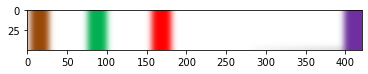

coldet [-1, -1, -1, -1, -1, 4, 4, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 8, 8, 4, 4, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

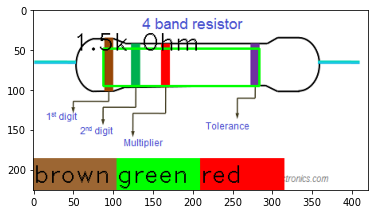

Processing Image 100.jpg
Image shape:  (464, 788, 3)
mean:  (253.18900971468582, 253.47869442499564, 253.30164482321024, 0.0)
Processing Image 10k.jpg
Image shape:  (463, 715, 3)
mean:  (246.98486610581642, 244.06473440166744, 238.53933453155915, 0.0)
res:


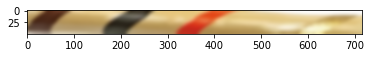

coldet [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, -1

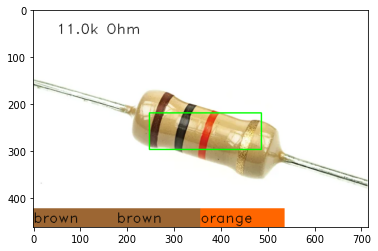

Processing Image 15k.jpg
Image shape:  (448, 844, 3)
mean:  (242.16408894719024, 246.8759177175017, 246.17659053402164, 0.0)
res:


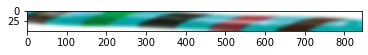

coldet [-1, -1, -1, -1, -1, -1, -1, -1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 4, 4, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -1, -1, -1, -1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

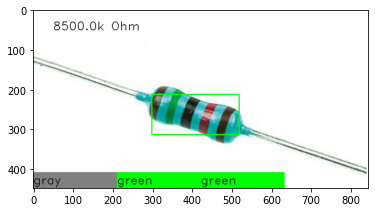

Processing Image 270_1.jpg
Image shape:  (400, 400, 3)
mean:  (237.3919375, 234.853475, 232.29391875000002, 0.0)
Final Output:


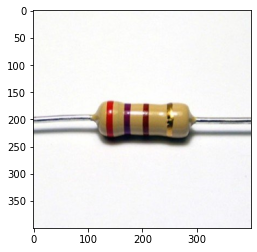

Processing Image 270_2.jpg
Image shape:  (618, 1360, 3)
mean:  (252.14724086236436, 251.67216709499334, 251.17261445840472, 0.0)
res:


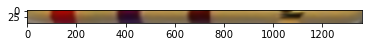

coldet [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

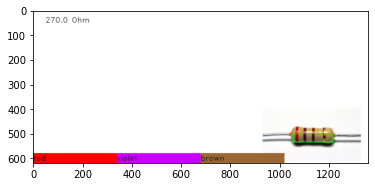

Processing Image 3.9k.jpg
Image shape:  (445, 848, 3)
mean:  (243.23964384142462, 246.2061638753445, 245.3384990460038, 0.0)
res:


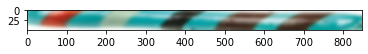

coldet [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

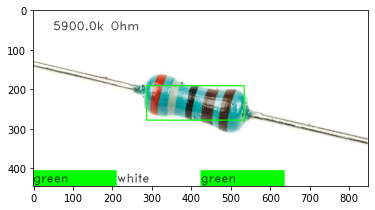

Processing Image 4.7k.jpg
Image shape:  (458, 782, 3)
mean:  (247.85147254269089, 248.33178279855704, 248.46351310602083, 0.0)
res:


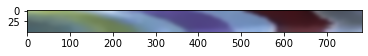

coldet [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

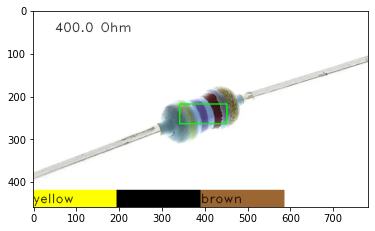

Processing Image 47k_1.jpg
Image shape:  (150, 400, 3)
mean:  (184.32436666666666, 186.38001666666668, 178.66505, 0.0)
res:


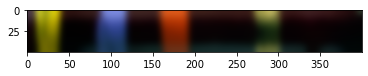

coldet [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, -1, -1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 8, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1

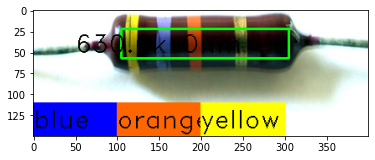

Processing Image 47k_2.jpg
Image shape:  (504, 733, 3)
mean:  (243.7543959375474, 241.8199235583274, 239.64713127179022, 0.0)
res:


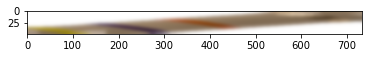

coldet [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

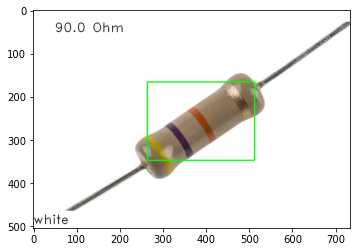

Processing Image 5.6k.jpg
Image shape:  (416, 853, 3)
mean:  (243.35122644061684, 247.63738558481379, 247.64277098926866, 0.0)
res:


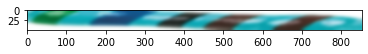

coldet [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

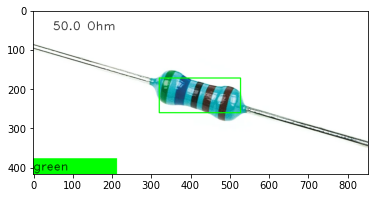

Processing Image 56k_1.jpg
Image shape:  (532, 1024, 3)
mean:  (245.16286566024434, 239.98454204358552, 231.69869926280543, 0.0)
res:


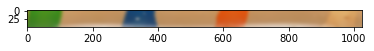

coldet [-1, -1, -1, -1, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

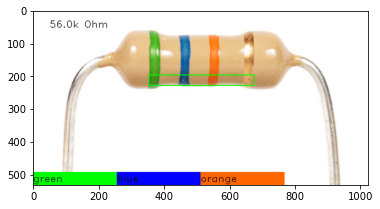

Processing Image 56k_2.jpg
Image shape:  (618, 1360, 3)
mean:  (251.02067984960976, 248.95689843898725, 245.63949409861033, 0.0)
res:


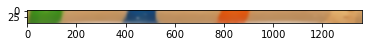

coldet [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

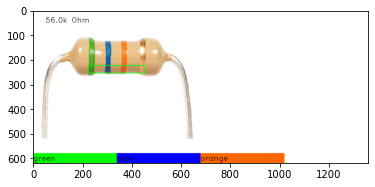

In [41]:
directory = os.fsencode("images")    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print("==============================")
    print("Processing Image " + filename)
    # load the image
    first_read_image = cv2.imread("images/" + filename)
    findResistance(first_read_image)